<a href="https://colab.research.google.com/github/mdapoy/Machine-Learning-week-8-16/blob/main/Ch4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PENJELASAN AWAL

Chapter 4 dari buku "Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow" menyelami detail internal bagaimana model Machine Learning dilatih. Berbeda dari bab-bab sebelumnya yang memperlakukan model sebagai "kotak hitam", bab ini membuka wawasan tentang mekanisme di balik algoritma pelatihan. Penulis, Aurélien Géron, fokus pada model regresi linear dan polinomial, serta metodenya.

## TUJUAN

Tujuan utama dari bab ini adalah untuk memberikan pemahaman yang kuat tentang bagaimana model-model dasar dilatih, khususnya Regresi Linier, Regresi Polinomial, Regresi Logistik, dan Regresi Softmax. Pembaca akan mempelajari metode closed-form dan optimasi iteratif seperti Gradient Descent dan varian-variannya, serta teknik regularisasi dan analisis kurva pembelajaran.

## Ringkasan Konten Utama

Chapter ini membahas topik-topik kunci dalam pelatihan model:


### 1.Linear Regression (Regresi Linier)

- Model Regresi Linier:
  - Model ini membuat prediksi dengan menghitung jumlah bobot (weighted sum) dari fitur-fitur input, ditambah bias term (atau intercept term).
  - Tujuan pelatihan adalah menemukan nilai θ yang meminimalkan Mean Squared Error (MSE) dari model.
  - Fungsi biaya MSE untuk Regresi Linier adalah:
  - 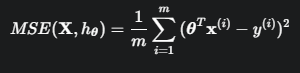
- The Normal Equation (Persamaan Normal):
  - Ini adalah solusi closed-form untuk menemukan nilai θ yang meminimalkan fungsi biaya MSE.
  - image.png
  - Contoh implementasi dengan NumPy menunjukkan bagaimana menghitung θ^dan membuat prediksi.
  - Scikit-Learn's LinearRegression class menggunakan pendekatan Singular Value Decomposition (SVD) untuk memecahkan masalah ini, yang lebih efisien dan stabil daripada Persamaan Normal, terutama untuk kasus di mana X^TX tidak invertible.
- Computational Complexity (Kompleksitas Komputasi):
  - Persamaan Normal memiliki kompleksitas sekitar O(n2.4) hingga O(n3) (dimana n adalah jumlah fitur), menjadikannya sangat lambat untuk jumlah fitur yang besar (misalnya, 100.000).
  - Pendekatan SVD (digunakan oleh LinearRegression) memiliki kompleksitas sekitar O(n
2
 ).
  - Kedua metode ini efisien untuk dataset pelatihan yang besar (linear with regard to the number of instances m) selama data muat di memori.

In [1]:
# Linear Regression
import numpy as np
# Generate some linear-looking data
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# The Normal Equation
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print("Theta Best from Normal Equation:\n", theta_best)

# Using Scikit-Learn's LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("LinearRegression intercept_ and coef_:\n", lin_reg.intercept_, lin_reg.coef_)

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
print("Predictions from Normal Equation:\n", y_predict)
print("Predictions from Scikit-Learn LinearRegression:\n", lin_reg.predict(X_new))

Theta Best from Normal Equation:
 [[3.88387515]
 [3.06439731]]
LinearRegression intercept_ and coef_:
 [3.88387515] [[3.06439731]]
Predictions from Normal Equation:
 [[ 3.88387515]
 [10.01266977]]
Predictions from Scikit-Learn LinearRegression:
 [[ 3.88387515]
 [10.01266977]]


### 2.Gradient Descent (Penurunan Gradien)

- Konsep Umum: Gradient Descent adalah algoritma optimasi iteratif yang bertujuan untuk meminimalkan fungsi biaya dengan secara bertahap menyesuaikan parameter model ke arah turunan (gradien) tercuram.
- Learning Rate (η): Ukuran langkah yang diambil. Jika terlalu kecil, konvergensi lambat. Jika terlalu besar, algoritma bisa divergen.
- Tantangan: Bisa terjebak dalam local minima atau lambat di plateaus (dataran tinggi). Namun, untuk fungsi biaya MSE Regresi Linier yang convex, Gradient Descent dijamin konvergen ke global minimum.
- Penskalaan Fitur: Sangat penting untuk memastikan semua fitur memiliki skala yang serupa agar Gradient Descent konvergen lebih cepat. Jika tidak, fungsi biaya akan berbentuk mangkuk yang memanjang, memperlambat proses optimasi.
- Gradient Vector (∇
θ
​
 MSE(θ)): Berisi semua partial derivatives dari fungsi biaya terhadap setiap parameter model.
- 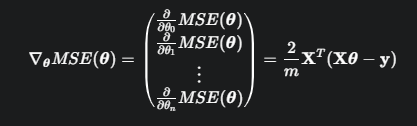
- Gradient Descent Step: θ
next step
​
 =θ−η∇
θ
​
 MSE(θ).
- Batch Gradient Descent:
  - Menghitung gradien menggunakan seluruh training set pada setiap langkah.
  - Lambat untuk training set yang sangat besar.
  - Kompleksitas: O(n) per iterasi (cepat untuk jumlah fitur n yang besar).
- Stochastic Gradient Descent (SGD):
  - Mengambil satu instansi pelatihan acak per langkah untuk menghitung gradien, membuatnya jauh lebih cepat untuk dataset besar.
  - Kurva fungsi biaya "melompat-lompat" karena sifat stochastic-nya, tetapi rata-rata akan mendekati global minimum.
  - Dapat membantu melarikan diri dari local minima.
  - Perlu learning schedule (gradually reducing the learning rate) untuk konvergensi yang sebenarnya.
  - Scikit-Learn menyediakan SGDRegressor untuk ini.
- Mini-batch Gradient Descent:
  - Kompromi antara Batch GD dan Stochastic GD, menghitung gradien pada kelompok kecil instansi acak (mini-batches).
  - Lebih stabil daripada Stochastic GD dan dapat memanfaatkan optimasi hardware untuk operasi matriks (terutama dengan GPU).
  - Kompleksitas: O(n) per iterasi.

In [2]:
# Gradient Descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

print("\nTheta from Batch Gradient Descent:\n", theta)

# Stochastic Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_sgd = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta_sgd - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients

print("Theta from Stochastic Gradient Descent:\n", theta_sgd)

# Using Scikit-Learn's SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X.reshape(-1,1), y.ravel()) # X and y need to be 1D for SGDRegressor's fit
print("SGDRegressor intercept_ and coef_:\n", sgd_reg.intercept_, sgd_reg.coef_)


Theta from Batch Gradient Descent:
 [[3.88387515]
 [3.06439731]]
Theta from Stochastic Gradient Descent:
 [[3.88194169]
 [3.08146779]]
SGDRegressor intercept_ and coef_:
 [3.84851768] [3.02793399]


### 3.Polynomial Regression (Regresi Polinomial)

- Konsep: Menggunakan model linier untuk menyesuaikan data nonlinier dengan menambahkan pangkat setiap fitur sebagai fitur baru.
- PolynomialFeatures dari Scikit-Learn dapat digunakan untuk mengubah data, menambahkan fitur polinomial hingga derajat tertentu.
- Peringatan: Jumlah fitur dapat meledak secara kombinatorial dengan derajat polinomial yang tinggi ($ \text{Number of features} = (n+d)! / (d!n!)$).

In [3]:
# Polynomial Regression
# Generate some nonlinear data
m = 100
X_poly_gen = 6 * np.random.rand(m, 1) - 3
y_poly_gen = 0.5 * X_poly_gen**2 + X_poly_gen + 2 + np.random.randn(m, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_poly_gen)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_poly_gen)
print("\nLinearRegression on Polynomial Features (intercept_ and coef_):\n", lin_reg_poly.intercept_, lin_reg_poly.coef_)


LinearRegression on Polynomial Features (intercept_ and coef_):
 [1.84952905] [[1.05325592 0.51937365]]


### 4.Learning Curves (Kurva Pembelajaran)

- Definisi: Plot kinerja model pada training set dan validation set sebagai fungsi dari ukuran training set.
- Mendeteksi Underfitting: Jika kedua kurva (train dan validation error) mencapai plateau pada nilai yang tinggi dan berdekatan, model mengalami underfitting. Menambahkan lebih banyak data pelatihan tidak akan membantu.
- Mendeteksi Overfitting: Jika ada gap yang besar antara kurva training error (rendah) dan validation error (tinggi), model mengalami overfitting.
- Bias/Variance Trade-off: Generalization error dapat dipecah menjadi bias (asumsi model salah, menyebabkan underfitting), variance (sensitivitas berlebihan terhadap variasi data pelatihan, menyebabkan overfitting), dan irreducible error (noise inheren dalam data).

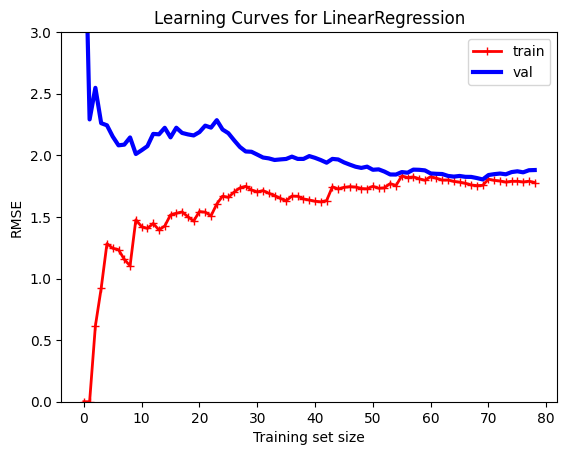

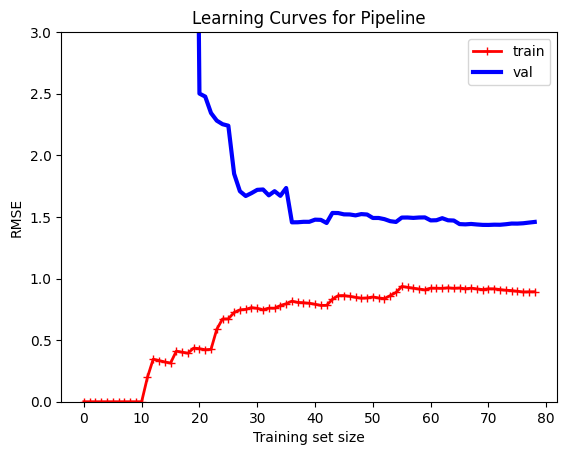

In [4]:
# Learning Curves
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train_part, X_val, y_train_part, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train_part)):
        model.fit(X_train_part[:m], y_train_part[:m])
        y_train_predict = model.predict(X_train_part[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_part[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curves for {model.__class__.__name__}")
    plt.ylim(0, 3) # Example limit for visualization
    plt.show()

# Example: Linear Regression learning curves
lin_reg_lc = LinearRegression()
plot_learning_curves(lin_reg_lc, X_poly_gen, y_poly_gen)

# Example: Polynomial Regression (degree=10) learning curves
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression_lc = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression_lc, X_poly_gen, y_poly_gen)

### 5.Regularized Linear Models (Model Linier Teregulasi)

- Konsep: Mengurangi overfitting dengan membatasi model (mengurangi degrees of freedom). Ini umumnya dilakukan dengan membatasi bobot model.
- Ridge Regression (Regresi Ridge):
  - Menambahkan term regularisasi ke fungsi biaya: α∑
i=1
n
​
 θ
i
2
​
 .
 - Fungsi biaya Ridge: J(θ)=MSE(θ)+α
2
1
​
 ∑
i=1
n
​
 θ
i
2
​
 .
 - Memaksa bobot model sekecil mungkin. Bias term (θ
0
​
 ) tidak diregulasi.
 - Sangat penting untuk menskalakan data sebelum melakukan Regresi Ridge.
 - Scikit-Learn: Ridge class (solusi closed-form menggunakan faktorisasi matriks Cholesky) atau SGDRegressor(penalty="l2").
- Lasso Regression (Regresi Lasso):
  - Menambahkan term regularisasi ke fungsi biaya menggunakan ℓ
1
​
  norm dari vektor bobot: α∑
i=1
n
​
 ∣θ
i
​
 ∣.
 - Fungsi biaya Lasso: J(θ)=MSE(θ)+α∑
i=1
n
​
 ∣θ
i
​
 ∣.
 - Cenderung mengeliminasi bobot fitur yang paling tidak penting (mengaturnya ke nol), sehingga melakukan seleksi fitur otomatis dan menghasilkan model sparse.
 - Scikit-Learn: Lasso class atau SGDRegressor(penalty="l1").
- Elastic Net:
  - Kompromi antara Regresi Ridge dan Lasso, dengan term regularisasi campuran dari keduanya.
  - Fungsi biaya Elastic Net: J(θ)=MSE(θ)+rα∑
i=1
n
​
 ∣θ
i
​
 ∣+[cite
s
​
 tart]
2
1−r
​
 α∑
i=1
n
​
 θ
i
2
​
 .
 - Parameter r mengontrol rasio campuran (0 = Ridge, 1 = Lasso).
 - Umumnya disukai daripada Lasso karena Lasso bisa berperilaku tidak menentu dalam kasus tertentu (fitur banyak atau sangat berkorelasi).
 - Scikit-Learn: ElasticNet class.
- Early Stopping (Penghentian Awal):
  - Teknik regularisasi yang menghentikan pelatihan segera setelah validation error mencapai minimumnya.
  - Sangat efektif untuk algoritma pembelajaran iteratif seperti Gradient Descent.
  

In [5]:
# Regularized Linear Models
# Data for regularization examples
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg + np.random.randn(100, 1)

# Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_reg, y_reg)
print("\nRidge Regression prediction for [[1.5]]:", ridge_reg.predict([[1.5]]))

# Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_reg, y_reg)
print("Lasso Regression prediction for [[1.5]]:", lasso_reg.predict([[1.5]]))

# Elastic Net
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_reg, y_reg)
print("Elastic Net prediction for [[1.5]]:", elastic_net.predict([[1.5]]))

# Early Stopping (conceptual, full implementation from notebook needed)
# This requires a validation set and monitoring loss
# For full implementation, refer to the provided Jupyter notebook for Chapter 4.


Ridge Regression prediction for [[1.5]]: [8.54325479]
Lasso Regression prediction for [[1.5]]: [8.45832142]
Elastic Net prediction for [[1.5]]: [8.37351746]


### 6.Logistic Regression (Regresi Logistik)


- Estimating Probabilities (Estimasi Probabilitas):
  - Digunakan untuk mengestimasi probabilitas bahwa suatu instansi termasuk dalam kelas tertentu (klasifikasi biner).
  - Model menghitung jumlah bobot fitur (seperti Regresi Linier), tetapi kemudian menerapkan fungsi logistik (σ, sigmoid) pada hasilnya.
  - Fungsi logistik: σ(t)=
1+exp(−t)
1
​
 .
 - Prediksi:  
y
^
​
 =1 jika p≥0.5, dan  
y
^
​
 =0 jika p<0.5.
- Training and Cost Function (Pelatihan dan Fungsi Biaya):
  - Tujuan pelatihan adalah memberikan probabilitas tinggi untuk instansi positif dan rendah untuk instansi negatif.
  - Fungsi biaya untuk instansi tunggal:
  -  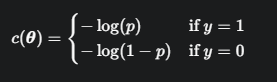
  - Fungsi biaya untuk seluruh training set adalah rata-rata log loss (cross-entropy).
  - Fungsi biaya convex, sehingga Gradient Descent dapat menemukan global minimum.
- Decision Boundaries (Batas Keputusan):
  - Model Regresi Logistik dapat mengestimasi probabilitas dan membuat batas keputusan linier antar kelas.
  - Hyperparameter C mengontrol kekuatan regularisasi (ℓ
2
​
  penalty secara default); nilai C yang lebih tinggi berarti regularisasi yang lebih rendah.

In [6]:
# Logistic Regression
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris["data"][:, 3:]  # petal width
y_iris = (iris["target"] == 2).astype(np.int64) # 1 if Iris virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_iris, y_iris)

X_new_iris = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_iris = log_reg.predict_proba(X_new_iris)
print("\nLogistic Regression Probabilities for petal width 1.7cm and 1.5cm:", log_reg.predict_proba([[1.7], [1.5]]))
print("Logistic Regression Predictions for petal width 1.7cm and 1.5cm:", log_reg.predict([[1.7], [1.5]]))


Logistic Regression Probabilities for petal width 1.7cm and 1.5cm: [[0.45713982 0.54286018]
 [0.66699864 0.33300136]]
Logistic Regression Predictions for petal width 1.7cm and 1.5cm: [1 0]


### 7. Softmax Regression (Regresi Softmax)

- Konsep: Generalisasi Regresi Logistik untuk mendukung banyak kelas secara langsung (klasifikasi multikelas).
- Menghitung skor s
k
​
 (x) untuk setiap kelas k.
- Kemudian menerapkan fungsi softmax (normalized exponential) pada skor untuk mengestimasi probabilitas setiap kelas p
k
​
 :
- 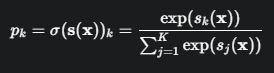
- Memprediksi kelas dengan probabilitas estimasi tertinggi.
- Cocok untuk kelas yang saling eksklusif.
- Fungsi Biaya: Cross entropy sering digunakan untuk mengukur seberapa baik probabilitas kelas yang diestimasi cocok dengan kelas target.
- 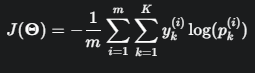
- Scikit-Learn's LogisticRegression dapat diatur untuk menggunakan Regresi Softmax dengan multi_class="multinomial" dan solver yang mendukungnya.

In [7]:
# Softmax Regression
X_softmax = iris["data"][:, (2, 3)] # petal length, petal width
y_softmax = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_softmax, y_softmax)

print("\nSoftmax Regression prediction for petal length 5cm, width 2cm:", softmax_reg.predict([[5, 2]]))
print("Softmax Regression probabilities for petal length 5cm, width 2cm:\n", softmax_reg.predict_proba([[5, 2]]))


Softmax Regression prediction for petal length 5cm, width 2cm: [2]
Softmax Regression probabilities for petal length 5cm, width 2cm:
 [[6.21626375e-07 5.73689803e-02 9.42630398e-01]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Konsep Kunci yang Dipelajari

- Model Linier: Dasar dari Regresi Linier dan bagaimana ia membuat prediksi.
- Fungsi Biaya (MSE): Metrik yang diminimalkan selama pelatihan Regresi Linier.
- Normal Equation: Solusi closed-form untuk Regresi Linier, serta kelebihan dan kekurangannya.
- Singular Value Decomposition (SVD): Metode yang lebih stabil dan efisien daripada Persamaan Normal yang digunakan oleh Scikit-Learn.
- Gradient Descent (GD): Algoritma optimasi iteratif yang fundamental dalam Machine Learning.
- Varian Gradient Descent:
  - Batch GD: Menggunakan seluruh dataset; lambat untuk dataset besar.
  - Stochastic GD: Menggunakan satu instansi acak; cepat tetapi stochastic.
  - Mini-batch GD: Menggunakan mini-batches; kompromi antara Batch dan Stochastic GD.
- Learning Rate: Hyperparameter penting yang menentukan ukuran langkah dalam Gradient Descent.
- Penskalaan Fitur: Sangat penting untuk Gradient Descent dan model teregulasi untuk konvergensi yang cepat dan akurat.
- Regresi Polinomial: Menggunakan model linier untuk data nonlinier dengan menambahkan fitur polinomial.
- Kurva Pembelajaran: Alat diagnostik untuk mendeteksi underfitting dan overfitting.
- Bias/Variance Trade-off: Konsep kunci dalam memahami generalization error model.
- Regularisasi: Teknik untuk mengurangi overfitting (Ridge, Lasso, Elastic Net, Early Stopping).
  - Ridge Regression: L
2
​
  penalty, mencegah bobot menjadi terlalu besar.
  - Lasso Regression: L
1
​
  penalty, menghasilkan model sparse (seleksi fitur).
  - Elastic Net: Kombinasi L
1
​
  dan L
2
​
  penalty.
  - Early Stopping: Menghentikan pelatihan saat validation error mulai meningkat.
- Regresi Logistik: Model klasifikasi biner yang mengestimasi probabilitas menggunakan fungsi sigmoid dan fungsi biaya cross-entropy.
- Regresi Softmax: Generalisasi Regresi Logistik untuk klasifikasi multikelas.
- Metode Analitis vs. Iteratif: Perbandingan antara solusi closed-form dan algoritma Gradient Descent.


## KESIMPULAN

Chapter 4 adalah bab krusial yang membawa pembaca dari penggunaan model sebagai "kotak hitam" ke pemahaman fundamental tentang mekanisme pelatihannya. Dengan menjelaskan Regresi Linier, Regresi Polinomial, dan terutama berbagai varian Gradient Descent, Géron memberikan landasan teoretis dan praktis yang diperlukan untuk melatih model-model ini secara efektif. Pengenalan kurva pembelajaran dan teknik regularisasi sangat penting untuk mendiagnosis dan mengatasi masalah overfitting dan underfitting. Penjelasan tentang Regresi Logistik dan Softmax secara rinci juga mempersiapkan pembaca untuk tugas klasifikasi yang lebih kompleks di bab-bab selanjutnya. Bab ini adalah jembatan penting menuju pemahaman deep learning yang lebih dalam.